In [1]:
from vis import *
from landmarks import *
from variations import *
import matplotlib.pyplot as plt
from stats import t_test_canal, wilcoxon_canal, get_angles
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
angles = get_angles("posterior", None, right)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


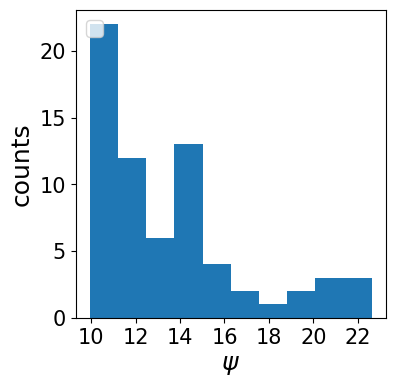

In [5]:
plt.figure(figsize=(4, 4))
plt.hist(angles)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("counts", fontsize=18)
plt.xlabel("$\psi$", fontsize=18)

plt.legend(fontsize=15, loc="upper left")

In [2]:
for canal in canals:
    print(canal)
    print("########################")
    print("initial\n")
    print(t_test_canal(canal, True))
    print(wilcoxon_canal(canal, True))

    print("\ncorrected\n")
    print(t_test_canal(canal, False))
    print(wilcoxon_canal(canal, False))

    print("\nboth\n")
    print(t_test_canal(canal, False, True))
    print(wilcoxon_canal(canal, False, True))
    print("\n\n")



anterior
########################
initial

TtestResult(statistic=-4.656327063509278, pvalue=1.3850239151105414e-05, df=74.0)
MannwhitneyuResult(statistic=26.0, pvalue=7.77688297749261e-07)

corrected

TtestResult(statistic=-7.8420748319546485, pvalue=2.0337689815889895e-12, df=120.0)
MannwhitneyuResult(statistic=483.0, pvalue=3.13659024935693e-12)

both

TtestResult(statistic=-1.6887519895673317, pvalue=0.09645817548225309, df=60.0)
MannwhitneyuResult(statistic=125.0, pvalue=0.05634466179098012)



posterior
########################
initial

TtestResult(statistic=-4.73904722873934, pvalue=9.79823892281867e-06, df=76.0)
MannwhitneyuResult(statistic=29.0, pvalue=3.4721778903137944e-06)

corrected

TtestResult(statistic=-6.672457822270949, pvalue=8.810429062501825e-10, df=117.0)
MannwhitneyuResult(statistic=536.0, pvalue=1.272935221628858e-10)

both

TtestResult(statistic=-1.7629682611476538, pvalue=0.08308439403546986, df=59.0)
MannwhitneyuResult(statistic=163.0, pvalue=0.074666898163897

In [6]:
visualise_variation_modes(4, "lateral")

In [76]:
results_dict, best_fids_dict, min_angs_dict, max_improvs_dict, kept_dict = correct_fiducials_dicts()

In [65]:
min_angs_dict = {"anterior": 100, "lateral": 100, "posterior": 100, "all": 100}
max_improvs_dict = {"anterior": 0, "lateral": 0, "posterior": 0, "all": 0}
best_fids_dict = {"anterior": ["name", "name"], "lateral": ["name", "name"], "posterior": ["name", "name"], "all": ["name", "name"]}

for key in results_dict:
    # print(key)
    if "soft" not in key and "occiput" not in key: 
        for canal in ["anterior", "posterior", "lateral"]:
            if results_dict[key][canal][0] < min_angs_dict[canal]:
                min_angs_dict[canal] = results_dict[key][canal][0]
                best_fids_dict[canal][0] = key
            if results_dict[key][canal][1] > max_improvs_dict[canal]:
                max_improvs_dict[canal] = results_dict[key][canal][1]
                best_fids_dict[canal][1] = key

In [66]:
min_angs_dict

{'anterior': 18.786835064554623,
 'lateral': 10.76444270692611,
 'posterior': 16.747945433845057,
 'all': 100}

In [67]:
best_fids_dict

{'anterior': ['nasion, left top orbit, right bottom orbit', 'name'],
 'lateral': ['nasion, right bottom orbit, septum',
  'left top orbit, right top orbit, septum'],
 'posterior': ['right top orbit, nasion, left bottom orbit', 'name'],
 'all': ['name', 'name']}

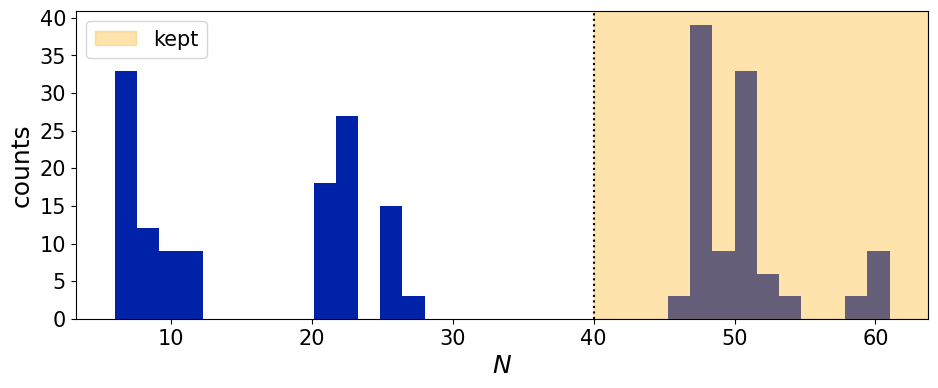

In [50]:
plt.figure(figsize=(11, 4))


plt.hist(list(kept_dict.values()), bins=35, color=np.array([0x00, 0x22, 0xaa])/256)
ylims = plt.ylim()
xlims = plt.xlim()
plt.plot([40, 40], [0, 100], "k:")
plt.fill_between([40, plt.xlim()[1]], [0, 0], [ylims[1]]*2, color=np.array([0xff, 0xbb, 0x33])/256, alpha=0.4, label="kept")
plt.ylim(ylims)
plt.xlim(xlims)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("counts", fontsize=18)
plt.xlabel("$N$", fontsize=18)

plt.legend(fontsize=15, loc="upper left")

In [78]:
visualise_canal_planes(right[13::4], "posterior", get_landmarks_from_key(best_fids_dict["posterior"][0]), True, False, False, 3)

In [20]:
meshes = []
lines = []

for i, subject in enumerate([2, 3, 5, 8, 10, 12, 15, 16]):
    vertices, triangles = get_canal_mesh(subject, "posterior", center=True, full=True)
    vertices = vertices + [3*i, 3*i, 0]
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    mesh.triangles = o3d.utility.Vector3iVector(triangles)
    mesh.paint_uniform_color(np.array([0x00, 0x22, 0xaa])/236)
    mesh.compute_vertex_normals()


    meshes.append(mesh)

visualise_meshes(meshes)

In [15]:
angles_a = []
angles_b = []

for canal in canals:
    angles_b.append(get_angles(canal, None, right))
    angles_a.append(get_angles(canal, get_landmarks_from_key(best_fids_dict[canal][0]), right))

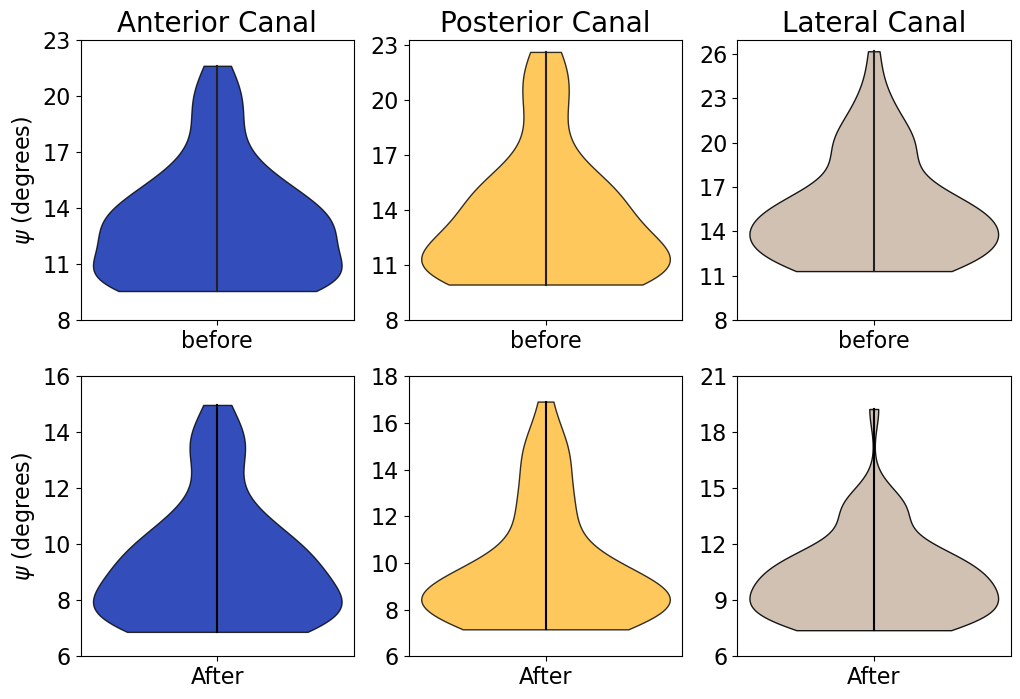

In [56]:
colors = ["#0022aa", "#ffbb33", "#ccbbaa"]
alphas = [0.8, 0.8, 0.9]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for c, canal in enumerate(canals):


    plots1 = axs[0, c].violinplot(angles_b[c], showextrema=False)
    plots2 = axs[1, c].violinplot(angles_a[c], showextrema=False)
    axs[0, c].plot([1, 1], [np.min(angles_b[c]), np.max(angles_b[c])], color="#222222")
    axs[1, c].plot([1, 1], [np.min(angles_a[c]), np.max(angles_a[c])], color="black")

    for pc in plots1['bodies']:
        pc.set_facecolor(colors[c])
        pc.set_edgecolor('black')
        pc.set_alpha(alphas[c])

    for pc in plots2['bodies']:
        pc.set_facecolor(colors[c])
        pc.set_edgecolor('black')
        pc.set_alpha(alphas[c])

    axs[0, c].tick_params(labelsize=16)
    axs[0, c].set_xticks([1])
    axs[0, c].set_xticklabels(["before"], fontsize=16)
    if c==0: axs[0, c].set_ylabel("$\psi$ (degrees)", fontsize=16)
    axs[0, c].set_title(canal.title() + " Canal", fontsize=20)
    if c==2: axs[0, c].set_yticks(np.arange(8, 27, 3))
    else: axs[0, c].set_yticks(np.arange(8, 25, 3))

    axs[1, c].tick_params(labelsize=16)
    axs[1, c].set_xticks([1])
    axs[1, c].set_xticklabels(["After"], fontsize=16)
    if c==0: axs[1, c].set_ylabel("$\psi$ (degrees)", fontsize=16)

    if c==2: axs[1, c].set_yticks(np.arange(6, 24, 3))
    elif c==1: axs[1, c].set_yticks(np.arange(6, 20, 2))
    else: axs[1, c].set_yticks(np.arange(6, 18, 2))

In [40]:
vertices, triangles = get_canal_mesh(4, "vestibule")
vest_mesh = o3d.geometry.TriangleMesh()
vest_mesh.vertices = o3d.utility.Vector3dVector(vertices)
vest_mesh.triangles = o3d.utility.Vector3iVector(triangles)
# vest_mesh.compute_vertex_normals()
vest_mesh.paint_uniform_color([0.3, 0.3, 0.3])

vertices, triangles = get_canal_mesh(4, "posterior", full=True)
post_mesh = o3d.geometry.TriangleMesh()
post_mesh.vertices = o3d.utility.Vector3dVector(vertices)
post_mesh.triangles = o3d.utility.Vector3iVector(triangles)
# post_mesh.compute_vertex_normals()
post_mesh.paint_uniform_color(np.array([0x00, 0x22, 0xaa])/256)

vertices, triangles = get_canal_mesh(4, "anterior", full=False)
ant_mesh = o3d.geometry.TriangleMesh()
ant_mesh.vertices = o3d.utility.Vector3dVector(vertices)
ant_mesh.triangles = o3d.utility.Vector3iVector(triangles)
# ant_mesh.compute_vertex_normals()
ant_mesh.paint_uniform_color(np.array([0xff, 0xbb, 0x33])/256)

visualise_meshes([vest_mesh, post_mesh, ant_mesh])

In [9]:
subjects = [4]
meshes = []
for i in subjects:
    path = get_ply_path(i)
    mesh = o3d.io.read_triangle_mesh(path)
    mesh_coloured = colour_mesh(mesh)
    if i in left: mesh_coloured.vertices = o3d.utility.Vector3dVector(flip_left(mesh_coloured))
    # mesh_coloured.compute_vertex_normals()
    mesh_coloured.vertices = o3d.utility.Vector3dVector(center_mesh_vertices(mesh_coloured))
    meshes.append(mesh_coloured)
visualise_meshes(meshes)

(0.0, 0.5)

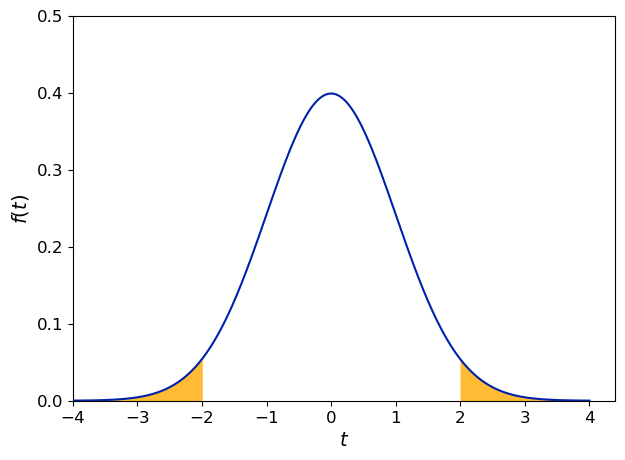

In [43]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 5))
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)


d = 250

plt.plot(x, y, color="#0022aa")
plt.fill_between(x[-d:], y[-d:], alpha=1, color="#ffbb33")
plt.fill_between(x[:d], y[:d], alpha=1, color="#ffbb33")
# plt.grid()

plt.xlabel("$t$", fontsize=14)
plt.ylabel("$f(t)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.xlim(-4)
plt.ylim(0, 0.5)



In [17]:
best_alignment(right, "posterior", 0)

### Slider and GUI experiments

In [2]:
visualise_variation_modes(1, "posterior")

In [ ]:
subject = 9
canal = "posterior"

v, t = get_canal_mesh(subject, canal)
canal_mesh = o3d.geometry.TriangleMesh()
canal_mesh.vertices = o3d.utility.Vector3dVector(v)
canal_mesh.triangles = o3d.utility.Vector3iVector(t)
canal_mesh.compute_vertex_normals()
canal_mesh.paint_uniform_color([0.49019608, 0.51764706, 1]) 

def screenshot(vis):
    vis.capture_screen_image("subject {} {}.png".format(subject, canal), do_render=False)

def rotate_view(vis):
    ctr = vis.get_view_control()
    ctr.rotate(10.0, 0.0)
    return False

vis = o3d.visualization.VisualizerWithKeyCallback()
vis.create_window()
vis.add_geometry(canal_mesh)
vis.get_render_option().mesh_show_back_face = True
vis.register_animation_callback(rotate_view)
# vis.register_key_callback(ord("W"), screenshot)
# vis.set_full_screen(True)

vis.run()
vis.destroy_window()

### Horn's analysis

In [ ]:
canal = "anterior"
rd2, fd2, vd2 = load_fiducials_dicts(visible=True)
vertices, t = get_canal_mesh(right[0], canal)
sample_cov = np.zeros((len(vertices)*3, len(vertices)*3))
# for subject in right:
#     vertices, t = get_canal_mesh(subject, canal)
#     vertices -= np.mean(vertices, axis=0)
#     vertices = rotate_vertices(vertices, get_rotation_matrix(subject, get_landmarks_from_key(fd2[canal])))
#     vertices = vertices.reshape(vertices.shape[0] * 3)
#     sample_cov += np.outer(vertices, vertices)

p = len(right)
N = len(right)
B = 300

evals_matrix = []
for b in range(B):
    sample_cov = np.zeros((p, p))
    for n in range(N):
        x = np.random.normal(0, 1, p)   
        sample_cov += np.outer(x, x)
    sample_cov /= N - 1
    corr = get_correlation_from_covariance(sample_cov)
    evals, evecs = np.linalg.eigh(sample_cov)
    evals_matrix.append(evals)

evals_matrix = np.array(evals_matrix)
thresholds = np.percentile(evals_matrix, 95, axis=0)
thresholds[-20:]

In [ ]:
canal = "anterior"
rd2, fd2, vd2 = load_fiducials_dicts(visible=True)
vertices, t = get_canal_mesh(right[0], canal)
sample_cov = np.zeros((len(vertices)*3, len(vertices)*3))
mean_vertices = np.zeros(len(vertices)*3)
for subject in right:
    vertices, t = get_canal_mesh(subject, canal)
    rotation = get_rotation_matrix(subject, get_landmarks_from_key(fd2[canal]))
    vertices = rotate_vertices(vertices-np.mean(vertices, axis=0), rotation)
    mean_vertices += vertices.reshape(vertices.shape[0] * 3)
mean_vertices /= len(right)
for subject in right:
    vertices, t = get_canal_mesh(subject, canal)
    rotation = get_rotation_matrix(subject, get_landmarks_from_key(fd2[canal]))
    vertices = rotate_vertices(vertices-np.mean(vertices, axis=0), rotation)
    vertices = vertices.reshape(vertices.shape[0] * 3)
    sample_cov += np.outer(vertices - mean_vertices, vertices - mean_vertices)
sample_cov /= len(right) - 1
evals, evecs = np.linalg.eigh(get_correlation_from_covariance(sample_cov))

### Rewrite the fiducial ranking

In [3]:
results_dict, best_fids_dict, min_angs_dict, max_improvs_dict, kept_dict = load_fiducials_dicts(True)
len(results_dict)

414

### Plane fit evaluation

In [145]:
evs = np.zeros((3, 3, len(right)))
canals = ["posterior", "anterior", "lateral"]
for c, canal in enumerate(canals):
    for s, subject in enumerate(right):
        vals, vecs = get_canal_plane(subject, canal)
        evs[c, :, s] = vals

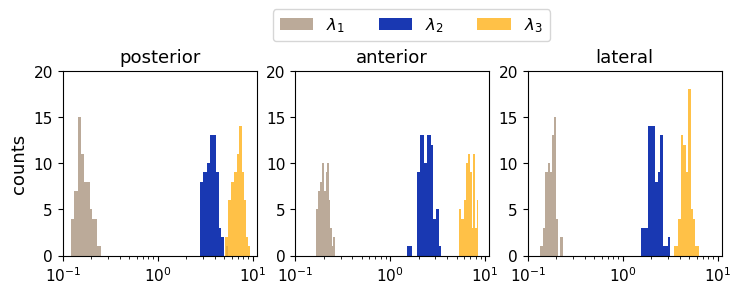

In [148]:
fig, axs = plt.subplots(1, 3, figsize = (8.5, 2.4))
colors = ["#ffbb33", "#0022aa", "#bbaa99"]
for c, canal in enumerate(canals):
    axs[c].hist(evs[c, 0], color = colors[2], bins=11, label="$\lambda_1$")
    axs[c].hist(evs[c, 1], color = colors[1], alpha=0.9, label="$\lambda_2$")
    axs[c].hist(evs[c, 2], color = colors[0], alpha=0.9, label="$\lambda_3$")
    axs[c].set_xscale('log')
    axs[c].set_title(canal, fontsize=13)
    axs[c].set_ylim((0, 20))
    axs[c].tick_params(labelsize=11)
    axs[c].set_xlim((0.1, 11))
    if c==0: axs[c].set_ylabel("counts", fontsize=13)
    # axs[c].set_xticks(np.arange(0, 10, 2))
    # axs[c].set_yticks(np.arange(-4, 6, 2))
plt.legend(loc=(-1.315, 1.16), ncol=3, fontsize=12)

In [3]:
for c, canal in enumerate(canals):
    print(canal, np.mean(evs[c, 1, :]/evs[c, 0, :]), np.mean(evs[c, 2, :]/evs[c, 0, :]), np.mean(evs[c, 2, :]/evs[c, 1, :]))

posterior 22.269449137739105 42.32014492829828 1.9102605326459012
anterior 12.218363934640195 33.88359820615394 2.798361024133245
lateral 12.449276332346017 26.5230033559221 2.151136095842287


In [3]:
R2s = np.zeros((3, len(right)))
for c, canal in enumerate(canals):
    for s, subject in enumerate(right):
        R2s[c, s] = 1 - evs[c, 0, s]/np.prod(evs[c, :, s])

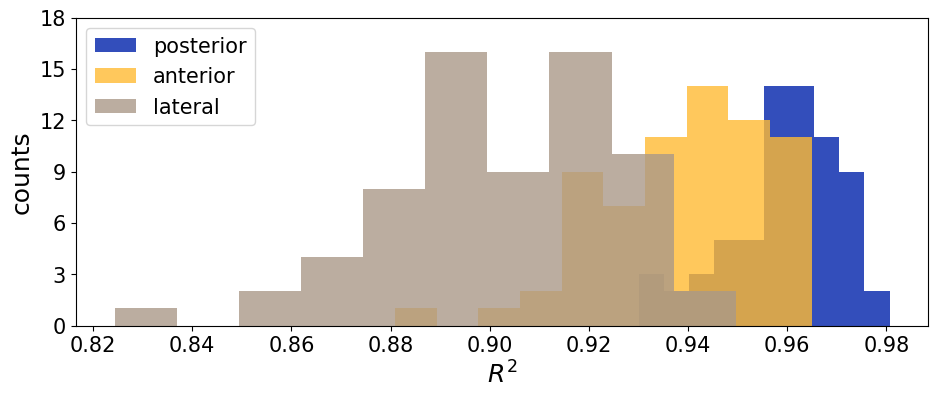

In [153]:
plt.figure(figsize=(11, 4))
colors = ["#0022aa", "#ffbb33", "#aa9988"]
alphas = [0.8, 0.6, 0.8]
for c, canal in enumerate(canals):
    plt.hist(R2s[c], bins=10, alpha=0.8, label=canal, color=colors[c])
plt.xticks(fontsize=15)
plt.yticks(np.arange(0, 21, 3), fontsize=15)

plt.ylabel("counts", fontsize=18)
plt.xlabel("$R^2$", fontsize=18)

plt.legend(fontsize=15)

In [5]:
print(np.mean(R2s, axis = 1), np.min(R2s, axis = 1), np.max(R2s, axis = 1), sep="\n")

[0.9598037  0.93870974 0.90244031]
[0.93001671 0.88088753 0.82434199]
[0.98062268 0.9649451  0.94961694]
